## Summary

**What problem is addressed in the notebook?**

How we can use *scipy* and *laughingrook* to solve problems involving **discrete random variables.**

**Is the problem solved in a single notebook?** \
*(If no, then where are the other notebooks?)*

Yes.

**Did you do anything novel in the notebook?** \
*(If yes, then what was the novel thing and should it be note for further use?)*

Yes, we defined `simulate_n_dice`, a function that simulates the score of rolling *n* dice.
It returns the score and the probability of rolling that score.

It probably does not need to be documented further, but it  may be quite useful to simulate non-trivial distributions for testing.

**Is there anything you have done for the first time?** \
*(If yes, then what do you show for the first time?)*

We initialised an instance of *scipy's* `rv_discete` by passing an argument for `values`.
The benefits of using an instance of `rv_discrete` to represent a discrete random variable is that we gain access to a suite of useful statistical methods, so we do not have define them ourselves.

We also show off the use of *laughingrook's* `graphics` and `rvhelpers` modules, which contain convenient helper methods that can be used when working with *scipy's* random variables.

**References**

- M343 Book 1, *Probability and random variables*
- [SciPy, scipy.stats.rv_discrete](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_discrete.html)
- [LaughingRook](https://github.com/ljk233/LaughingRook.py)

## Dependencies

In [1]:
import itertools as it                     # used to get the cross product
from collections import Counter            # Count occurrences of a score
import numpy as np                         # data structure
import pandas as pd                        # data structure
from scipy import stats as st              # data anslysis
from matplotlib import pyplot as plt       # plotting package
import seaborn as sns                      # advanced statistical visuals
from laughingrook import graphics as gfx   # convenience plotting functions
from laughingrook import rvhelpers as rvh  # convenience functions, scipy rv

In [2]:
%load_ext watermark
%watermark --iv

matplotlib  : 3.6.0
numpy       : 1.23.3
laughingrook: 0.1.0
seaborn     : 0.12.0
scipy       : 1.9.1
pandas      : 1.5.0



## Functions

In [3]:
def simulate_n_dice_rolls(n: int) -> tuple[list, list]:
    """Return the event space and Pr(event) from the combined scores of
    rolling two dice.

    Preconditions
    - n >= 1

    Returns
    - xs, the event space
    - px, the P(X=x), x in xs
    """
    dice = [np.arange(1, 7, dtype=int) for _ in range(n)]
    candidates = [prod for prod in it.product(*dice)]
    events_counter = Counter([sum(event) for event in [*candidates]])
    n = events_counter.total()
    return (
        [x for x in events_counter],
        [k/n for k in events_counter.values()]
    )

## Main

In [4]:
%precision 3
sns.set_theme()

### Initialise the random variable

We are modelling the possible scores from rolling two die.

In [5]:
xs, pr = simulate_n_dice_rolls(2)
rv_scores = st.rv_discrete(values=(xs, pr), name='score')

### Plot the random variable

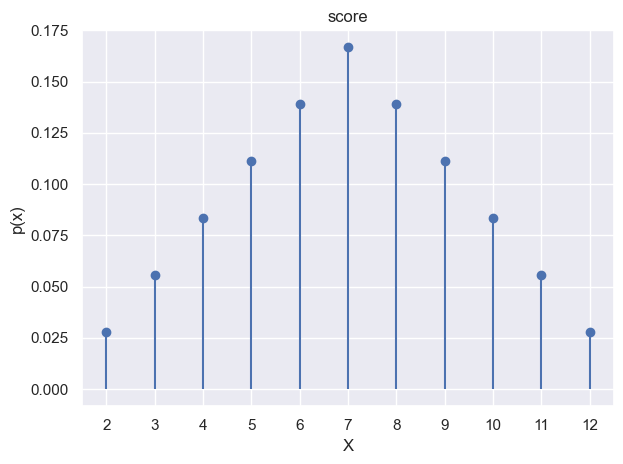

In [6]:
gfx.std_stemplot(xs, rv_scores.pmf(xs), rv_scores.name, 'X', 'p(x)')

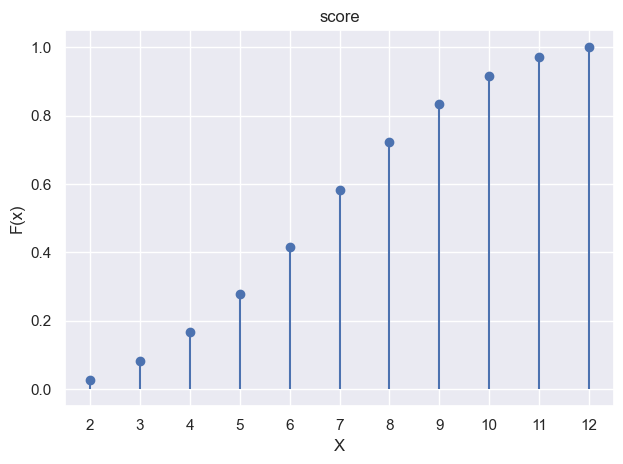

In [7]:
gfx.std_stemplot(xs, rv_scores.cdf(xs), rv_scores.name, 'X', 'F(x)')

### Calculating probabilities

In [8]:
rvh.probability_table(rv_scores).T

,pmf,cdf
score,,
2,0.027778,0.027778
3,0.055556,0.083333
4,0.083333,0.166667
5,0.111111,0.277778
6,0.138889,0.416667
7,0.166667,0.583333
8,0.138889,0.722222
9,0.111111,0.833333
10,0.083333,0.916667


In [9]:
rv_scores.pmf(6)  # P(6)

0.139

In [10]:
rv_scores.cdf(6)  # F(6)

0.417

In [11]:
rv_scores.sf(6)   # P(X>6) == 1 - F(6)

0.583

### Calculating quantiles

In [12]:
rv_scores.ppf(0.5)       # median, could use rv.median()

7.000

In [13]:
rv_scores.interval(0.5)  # lower, upper quartiles

(5.000, 9.000)

In [14]:
rvh.iqr(rv_scores)       # interquartile range

4.000

### Expectation and variance

In [15]:
rvh.describe(rv_scores)

mean         7.0
var     5.833333
min            2
lq           5.0
med          7.0
uq           9.0
max           12
Name: score, dtype: object

In [16]:
rv_scores.mean()  # E(X)

7.000

In [17]:
rv_scores.var()   # V(X)

5.833

### Sampling the distribution

In [18]:
rv_scores.rvs(size=9)  # sample the distribution

array([ 4, 11,  6,  8,  9, 10,  7, 11,  3])

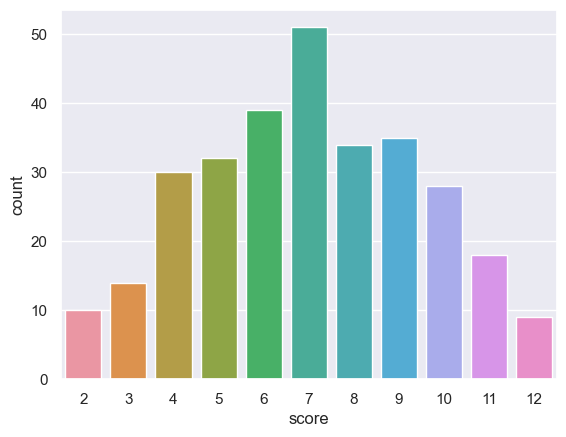

In [19]:
# plot sampled values
sns.countplot(x=rv_scores.rvs(size=300))
plt.xlabel('score')
plt.show()